In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [2]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [3]:
Transit_Reviews=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal_100m.csv')
Transit=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [4]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [5]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [6]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [7]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [8]:
column1=['Hotel_name','mean_reviewer_score']

In [9]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [10]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [11]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,2,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,2,19.0,5.852632
6,The Principal London,2,1425.0,8.029333
7,Park Plaza County Hall London,2,2223.0,8.369546
8,One Aldwych,3,136.0,9.144853
9,Splendid Etoile,8,127.0,9.142520


In [12]:
TransitGroups=Connect.transit_count.unique()

In [13]:
TransitGroups.size

17

In [14]:
Connect['transit_count'].value_counts().sort_values(ascending=False)

0     562
1     341
2     185
3     157
4     101
5      47
6      28
8      20
7      18
10      6
9       4
14      2
17      2
16      1
18      1
13      1
19      1
Name: transit_count, dtype: int64

In [15]:
bins = [-1, 0, 2, 4, 6, 8, 20]
groups=Connect.groupby(['transit_count',pd.cut(Connect.transit_count, bins)])
Transits = groups.size().unstack().sum()
Transits

transit_count
(-1, 0]    562.0
(0, 2]     526.0
(2, 4]     258.0
(4, 6]      75.0
(6, 8]      38.0
(8, 20]     18.0
dtype: float64

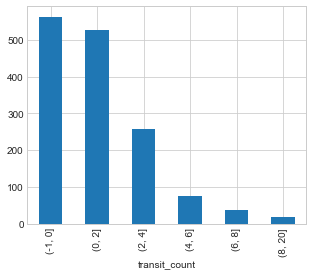

In [16]:
Transits.plot('bar')
plt.show()

In [17]:
Con1 = Connect[Connect.transit_count==0].mean_reviewer_score.mean()
Con1

8.492160449427232

In [18]:
Con2 = Connect[(Connect['transit_count']>0) & (Connect['transit_count']<5)].mean_reviewer_score.mean()
Con2

8.451592721307414

In [19]:
Con3 = Connect[(Connect['transit_count']>4) & (Connect['transit_count']<7)].mean_reviewer_score.mean()
Con3

8.322563808278558

In [20]:
Con4 = Connect[(Connect['transit_count']>6) & (Connect['transit_count']<9)].mean_reviewer_score.mean()
Con4

8.64493288907558

In [21]:
Con5 = Connect[(Connect['transit_count']>8) & (Connect['transit_count']<11)].mean_reviewer_score.mean()
Con5

8.928118227884898

In [22]:
Con6 = Connect[(Connect['transit_count']>10) & (Connect['transit_count']<13)].mean_reviewer_score.mean()
Con6

nan

In [23]:
Con7 = Connect[(Connect['transit_count']>12) & (Connect['transit_count']<15)].mean_reviewer_score.mean()
Con7

8.125826376666158

In [24]:
Con8 = Connect[(Connect['transit_count']>14) & (Connect['transit_count']<17)].mean_reviewer_score.mean()
Con8

8.271559633027525

In [25]:
Con9 = Connect[(Connect['transit_count']>16) & (Connect['transit_count']<19)].mean_reviewer_score.mean()
Con9

8.578075048732941

In [26]:
Con10 = Connect[(Connect['transit_count']>18) & (Connect['transit_count']<21)].mean_reviewer_score.mean()
Con10

8.642391304347827

In [27]:
Hotel_City_Reviews=pd.read_csv("Hotel_Info_Country_City.csv", usecols=['Hotel_Name','City'])

In [34]:
Milan=Hotel_City_Reviews.loc[Hotel_City_Reviews['City']=='Milan']
len(Milan.Hotel_Name.unique())

162

In [35]:
hotels_zero_transit=pd.DataFrame(Connect[Connect.transit_count==0].Hotel_Name)


In [36]:
Hotel_Milan = hotels_zero_transit[hotels_zero_transit['Hotel_Name'].isin(Milan.Hotel_Name.unique())]
Hotel_Milan

,Hotel_Name
851,Hotel Regina
892,IH Hotels Milano Puccini
901,Boscolo Milano Autograph Collection
1171,Hotel Principe Di Savoia
1177,Hotel Mozart
1181,Hotel Michelangelo
1288,Room Mate Giulia
1331,Art Hotel Navigli
1334,Camperio House Suites Apartments
1341,MiHotel


In [37]:
import langid
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LiverJoker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv")
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name'].isin(Hotel_Milan.Hotel_Name.unique())]
len(TEMP)

15340

In [40]:
corpusP= []
corpusN= []
uniqueUsefulTokens= set()

for i in TEMP.index:
       reviewP=""
       reviewN="" 
       if ("No Negative" in TEMP['Negative_Review'][i]) and "No Positive" in TEMP['Positive_Review'][i]:
            continue
       elif "No Negative" in TEMP['Negative_Review'][i]:
            reviewP = TEMP['Positive_Review'][i]
       else:
            reviewN = TEMP['Negative_Review'][i]
       
       if (langid.classify(reviewP)[0]!='en' and langid.classify(reviewN)[0]!='en'):
            continue
       reviewP= re.sub('[^a-zA-Z]', ' ', reviewP)
       reviewN= re.sub('[^a-zA-Z]', ' ', reviewN)

       reviewP=reviewP.lower().split()
       reviewN=reviewN.lower().split()

       ps=PorterStemmer()
       reviewP  = [ps.stem(word) for word in reviewP if not word in set(stopwords.words('english'))]
       reviewN  = [ps.stem(word) for word in reviewN if not word in set(stopwords.words('english'))]
       for word in reviewP:
            uniqueUsefulTokens.add(word)
       reviewP = ' '.join(reviewP)
    
       for word in reviewN:
            uniqueUsefulTokens.add(word)
       reviewN = ' '.join(reviewN)
    
       if reviewP!="":
            corpusP.append(reviewP)
        
    
       if reviewN!="":
            corpusN.append(reviewN)
            

In [41]:
len(corpusN)

11127

In [42]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    ifdDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word] +=1
            
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [43]:
from functools import reduce

In [44]:
bowA = []
for line in corpusN:
    line= re.sub('[^a-zA-Z]', ' ', line)
    bowA.append(line.split(" "))

bowAnew = reduce(lambda x,y: x+y,bowA)
len(bowA)

11127

In [45]:
wordSet=set(bowAnew)
wordSet

{'influens',
 'novotel',
 'shine',
 'terrain',
 'unrenov',
 'greet',
 'modernis',
 'funitur',
 'foyer',
 'aggras',
 'structur',
 'consciou',
 'parent',
 'restaurt',
 'fake',
 'miscommun',
 'desir',
 'hooksin',
 'scuff',
 'superiour',
 'awhil',
 'front',
 'temp',
 'demonstr',
 'drill',
 'champion',
 'wed',
 'lol',
 'walk',
 'hang',
 'spin',
 'improv',
 'russia',
 'even',
 'cheek',
 'vacat',
 'credibl',
 'bathromm',
 'synthet',
 'whole',
 'urin',
 'prior',
 'protecion',
 'alot',
 'descent',
 'sing',
 'assist',
 'wonder',
 'worthwhil',
 'disinterest',
 'temprat',
 'despit',
 'motorbik',
 'pokey',
 'includ',
 'foreign',
 'digit',
 'bang',
 'handl',
 'errat',
 'vagu',
 'pefect',
 'contain',
 'congress',
 'round',
 'footbal',
 'slow',
 'sup',
 'membership',
 'recption',
 'remind',
 'clientel',
 'cellphon',
 'moslem',
 'visibl',
 'portion',
 'darker',
 'prblem',
 'minuet',
 'brakefast',
 'presur',
 'seafood',
 'kip',
 'pointless',
 'sprinkler',
 'expenc',
 'wonderland',
 'bean',
 'interminabi

In [46]:
wordDictAarr = np.array([])
for listbowA in bowA:
    wordDictA = dict.fromkeys(wordSet,0)
    for word in listbowA:
        wordDictA[word]+=1
    wordDictAarr = np.append(wordDictAarr, wordDictA)

In [47]:
i = 0
tfBowAarr = np.array([])
for listbowA in bowA:
    tfBowA = computeTF(wordDictAarr[i], listbowA)
    i +=1
    tfBowAarr = np.append(tfBowAarr, tfBowA)
tfBowAarr

array([ {'influens': 0.0, 'novotel': 0.0, 'shine': 0.0, 'terrain': 0.0, 'unrenov': 0.0, 'greet': 0.0, 'modernis': 0.0, 'funitur': 0.0, 'foyer': 0.0, 'aggras': 0.0, 'structur': 0.0, 'consciou': 0.0, 'parent': 0.0, 'restaurt': 0.0, 'fake': 0.0, 'miscommun': 0.0, 'desir': 0.0, 'hooksin': 0.0, 'scuff': 0.0, 'superiour': 0.0, 'awhil': 0.0, 'front': 0.0, 'temp': 0.0, 'demonstr': 0.0, 'drill': 0.0, 'champion': 0.0, 'wed': 0.0, 'lol': 0.0, 'walk': 0.0, 'hang': 0.0, 'spin': 0.0, 'improv': 0.0, 'russia': 0.0, 'even': 0.0, 'cheek': 0.0, 'vacat': 0.0, 'credibl': 0.0, 'bathromm': 0.0, 'synthet': 0.0, 'whole': 0.0, 'urin': 0.0, 'prior': 0.0, 'protecion': 0.0, 'alot': 0.0, 'descent': 0.0, 'sing': 0.0, 'assist': 0.0, 'wonder': 0.0, 'worthwhil': 0.0, 'disinterest': 0.0, 'temprat': 0.0, 'despit': 0.0, 'motorbik': 0.0, 'pokey': 0.0, 'includ': 0.0, 'foreign': 0.0, 'digit': 0.0, 'bang': 0.0, 'handl': 0.0, 'errat': 0.0, 'vagu': 0.0, 'pefect': 0.0, 'contain': 0.0, 'congress': 0.0, 'round': 0.0, 'footbal': 0.

In [48]:
idfs = computeIDF(wordDictAarr)
idfsData = pd.DataFrame.from_dict(idfs, orient='index', dtype=float)
idfsData[0]=1/idfsData[0]

PosRev = pd.DataFrame(idfsData[0].sort_values(ascending=False))
PositiveReviews = PosRev.iloc[0:10, :]
PositiveReviews

,0
room,0.854394
hotel,0.594421
breakfast,0.542783
noth,0.439928
small,0.420886
staff,0.420715
bit,0.384894
could,0.380585
one,0.362273
like,0.359843
